In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [5]:
# create engine to hawaii.sqlite
engine=create_engine("sqlite:///hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session=Session(engine)


In [10]:
# Find the most recent date in the data set.
recent_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date


('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
print(f"The most recent date in the dataset is {recent_date}")

#Calculate the date one year from the last date in the data set
one_year_before=dt.date(2017,8,23)-dt.timedelta(days=365)
print(f"One year before our most recent date equates to {one_year_before}")

# Perform a query to retrieve the data and precipitation scores
#We can just say obtain dates greater than one year before our most recent date.
prcp_recent_year=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= '2016-08-23')
prcp_recent_year

# Save the query results as a Pandas DataFrame and set the index to the date column
prcp_df=pd.DataFrame(prcp_recent_year,columns=['Date','Precipitation'])
prcp_df

# Sort the dataframe by date
re_ordered=prcp_df.set_index('Date')
re_ordered



The most recent date in the dataset is ('2017-08-23',)
One year before our most recent date equates to 2016-08-23


,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


<Figure size 1440x360 with 0 Axes>

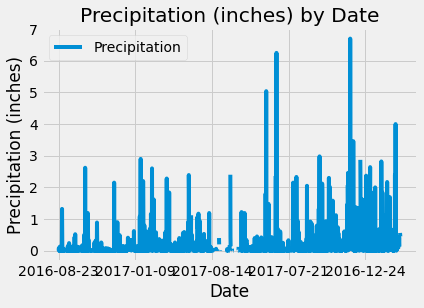

<Figure size 1440x360 with 0 Axes>

In [43]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_plotting=re_ordered.plot(title="Precipitation (inches) by Date",xlabel="Date",ylabel="Precipitation (inches)")

tick_locations=[]

# (kind='bar',facecolor="blue",title="Precipitation (inches) by Date"\
#                                     ,xlabel="Date",ylabel="Precipitation (inches)")


In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prcp_df.describe()
#USE .decribe!

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to calculate the total number stations in the dataset
total_stations=session.query(Station.station).count()
print(f"There are a total of {total_stations} stations in the dataset")

There are a total of 9 stations in the dataset


In [14]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station)\
.order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [34]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

#Where I filter on the specific station that I want to obtain data from
# most_activity=session.query(Measurement.station).filter(Measurement.station=='USC00519281')


#These are the specific data points I want to take from the above filtered dataset
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)\
.filter(Measurement.station=='USC00519281')).all()



                                                         

[(53.0, 87.0, 71.66378066378067)]

Text(0, 0.5, 'Frequency')

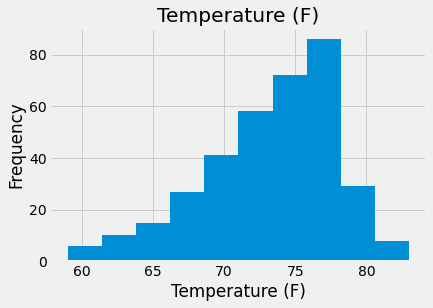

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_station_recenttemp=session.query(Measurement.tobs).filter(Measurement.station=='USC00519281')\
.filter(Measurement.date>= '2016-08-23').all()
active_station_recenttemp

temp_df=pd.DataFrame(active_station_recenttemp,columns=['Temperature (F)'])
temp_df

temp_df.hist(column='Temperature (F)')
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')


In [33]:
# Close Session
# session.close()